<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
    
Снова здравствуй! Меня зовут Даниил Вяжев, я буду снова проверять твой проект

Сразу хочу обратить внимание на цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> 

Никита, ты проделал хорошо работу над созданием ранжирующей модели рекомендаций. Тебе удалось грамотно структурировать обработку данных, применить модель, а также проработать все этапы – от подготовки данных до расчетов метрик.

Метрики оказались неоднозначными: высокая новизна говорит о предложении новых треков, но низкие значения precision и recall (0.041 и 0.006) сигнализируют о необходимости доработок. Ты также сделал верное замечание о сокращении объема данных по временным рамкам, чтобы снизить затраты времени, однако это привело к уменьшению покрытия. В будущем стоит попробовать сокращение по количеству пользователей, что, возможно, улучшит метрики покрытия и точности.

В целом, твоя работа демонстрирует хорошие знания подходов к построению рекомендательных систем и дальнейшие перспективы для улучшения в оптимизации данных и параметров модели. Желаю тебе удачи в будущих спринтах!
    
    
<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     


  

О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).



Желаю удачи!

<img src="https://user-images.githubusercontent.com/74038190/225813708-98b745f2-7d22-48cf-9150-083f1b00d6c9.gif" width="500">
</div>    



Даниил, привет!  
С выводом мой косяк, я хотел почистить лишний вывод, чтобы ноутбук не так много весил и случайно все удалил. Иначе его нельзя было добавить.

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import logging
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sys
import sklearn.preprocessing
import sklearn.metrics
import boto3

from dotenv import load_dotenv
from implicit.als import AlternatingLeastSquares
from pandas.tseries.offsets import MonthEnd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise import NormalPredictor
from sklearn.metrics.pairwise import cosine_similarity
from catboost import CatBoostClassifier, Pool

/home/mle-user/mle_projects/mle-recsys-project-start/.venv_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [3]:
session = boto3.session.Session()
s3_client = session.client(
    service_name='s3',
    endpoint_url='https://storage.yandexcloud.net'
)

In [4]:
load_dotenv()
S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Правильно, что импортировал всё в самом начале, но мне не хватило описания проекта и задачи, так проект бы выглядел презентабельнее и помог бы тебе вспомнить, когда ты к нему вернешься.
</div>



In [ ]:
tracks = pd.read_parquet("./recsys/initial/tracks.parquet")
tracks.info()

In [ ]:
catalog_names = pd.read_parquet("./recsys/initial/catalog_names.parquet")
catalog_names.info()

In [ ]:
interactions = pd.read_parquet("./recsys/initial/interactions.parquet")
interactions.info()

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [83]:
tracks.sample(3).T

,128755,430585,593173
track_id,2373296,29826434,41143944
albums,"[233929, 650518]",[3595984],[5372876]
artists,"[15170, 477067, 517093]",[4476523],[2395502]
genres,[11],[68],"[21, 22]"


In [84]:
tracks['track_id'].nunique()

1000000

In [85]:
catalog_names.sample(3).T

,1547314,1279143,18818
id,55121585,32483135,55926
type,track,track,album
name,Army of Angels,"Mozart: Piano Concerto No. 21 in C Major, K. 4...",Noir Sur Blanc


In [86]:
catalog_names['id'].nunique()

1776697

In [87]:
catalog_names['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [88]:
interactions.sample(3).T

,266,1559,25
user_id,535770,1040662,697806
track_id,76638251,63511059,20045347
track_seq,267,1560,26
started_at,2022-09-25 00:00:00,2022-11-21 00:00:00,2022-09-25 00:00:00


In [89]:
interactions['user_id'].value_counts()

user_id
398979     16637
1200889    15392
590868     15136
731216     13223
339714     12768
           ...  
653874         1
108229         1
1019304        1
357048         1
73645          1
Name: count, Length: 1373221, dtype: int64

In [90]:
interactions["started_at"].dt.to_period('M').value_counts()

started_at
2022-11    33968803
2022-10    31810464
2022-12    31043735
2022-09    26953965
2022-08    23919641
2022-07    20188819
2022-06    16266558
2022-05    13613489
2022-04    10230295
2022-03     7691225
2022-02     4533363
2022-01     2409541
Freq: M, Name: count, dtype: int64

In [91]:
interactions["started_at"].dt.to_period('Y').value_counts()

started_at
2022    222629898
Freq: A-DEC, Name: count, dtype: int64

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

1. Необходимо удалить пользователей с 5 или меньше событиями  
2. Для сокращения размера лучше оставить информацию за последние 2 месяца
3. Необходимо объединить информацию о треках с треками

In [92]:
interactions = interactions[interactions.groupby(['user_id']).transform('size') > 5]
interactions['user_id'].value_counts()

user_id
398979     16637
1200889    15392
590868     15136
731216     13223
339714     12768
           ...  
529972         6
529309         6
529278         6
620598         6
1294847        6
Name: count, Length: 1369604, dtype: int64

In [93]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222619423 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [94]:
event_cutoff_date = pd.to_datetime("2022-11-01").date()
interactions = interactions.query("started_at > @event_cutoff_date").copy()

In [95]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63918740 entries, 31 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 1.5 GB


In [96]:
catalog_names['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [97]:
track_names = catalog_names.loc[catalog_names['type'] == "track"]
track_names = track_names.drop(columns=["type"])
track_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 812471 to 1812470
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1000000 non-null  int64 
 1   name    1000000 non-null  object
dtypes: int64(1), object(1)
memory usage: 22.9+ MB


In [98]:
album_names = catalog_names.loc[catalog_names['type'] == "album"]
album_names = album_names.drop(columns=["type"])
album_names = album_names.rename(columns={"name": "album_name"})
album_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658724 entries, 0 to 658723
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          658724 non-null  int64 
 1   album_name  658724 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.1+ MB


In [99]:
album_names['id'].nunique()

658724

In [100]:
artist_names = catalog_names.loc[catalog_names['type'] == "artist"]
artist_names = artist_names.drop(columns=["type"])
artist_names = artist_names.rename(columns={"name": "artist_name"})
artist_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153581 entries, 658724 to 812304
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           153581 non-null  int64 
 1   artist_name  153581 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [101]:
genre_names = catalog_names.loc[catalog_names['type'] == "genre"]
genre_names = genre_names.drop(columns=["type"])
genre_names = genre_names.rename(columns={"name": "genre_name"})
genre_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 812305 to 812470
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          166 non-null    int64 
 1   genre_name  166 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [102]:
tracks = tracks.merge(track_names, left_on='track_id', right_on='id')
tracks.head()

,track_id,albums,artists,genres,id,name
0,26,"[3, 2490753]",[16],"[11, 21]",26,Complimentary Me
1,38,"[3, 2490753]",[16],"[11, 21]",38,Momma's Boy
2,135,"[12, 214, 2490809]",[84],[11],135,Atticus
3,136,"[12, 214, 2490809]",[84],[11],136,24 Hours
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],138,Don't Upset The Rhythm (Go Baby Go)


In [103]:
genre_names = genre_names.set_index("id")

In [104]:
tracks['genre_names'] = np.NAN

In [ ]:
gnr = genre_names.T.to_dict('list')
gnr

In [ ]:
for k,item in tracks['genres'].items():
    arr = []
    for i in range(len(item)):
        if item[i] in gnr.keys():
            arr.append(gnr[item[i]][0])
    tracks['genre_names'][k] = arr        

In [107]:
tracks.head(5)

,track_id,albums,artists,genres,id,name,genre_names
0,26,"[3, 2490753]",[16],"[11, 21]",26,Complimentary Me,"[pop, folk]"
1,38,"[3, 2490753]",[16],"[11, 21]",38,Momma's Boy,"[pop, folk]"
2,135,"[12, 214, 2490809]",[84],[11],135,Atticus,[pop]
3,136,"[12, 214, 2490809]",[84],[11],136,24 Hours,[pop]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],138,Don't Upset The Rhythm (Go Baby Go),[pop]


In [108]:
artist_names = artist_names.set_index("id")

In [109]:
artist_names.head()

,artist_name
id,
4,Kenny Dorham
5,Max Roach
7,Francis Rossi
9,Status Quo
12,Phil Everly


In [ ]:
tracks['artist_names'] = np.NAN
for k,item in tracks['artists'].items():
    arr = []
    for i in range(len(item)):
        for k_a, i_a in artist_names.items():
            if item[i] in i_a.keys():
                arr.append(i_a[item[i]])
    tracks['artist_names'][k] = arr 


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
В коде многократно используется цикл `for` с вложенными циклами для объединения информации из других таблиц. В Python это не оптимально для больших наборов данных:

Лучше аменить вложенные циклы, где это возможно, на map или apply. Конкретно для колонок `genre_names`, `artist_names` и `album_names` можно использовать метод `apply(lambda x: [gnr[i] for i in x if i in gnr])`. Это улучшит производительность по сравнению с вложенными циклами и доступом по ключу словаря.</div>




In [111]:
tracks.head()

,track_id,albums,artists,genres,id,name,genre_names,artist_names
0,26,"[3, 2490753]",[16],"[11, 21]",26,Complimentary Me,"[pop, folk]",[Elizabeth & the Catapult]
1,38,"[3, 2490753]",[16],"[11, 21]",38,Momma's Boy,"[pop, folk]",[Elizabeth & the Catapult]
2,135,"[12, 214, 2490809]",[84],[11],135,Atticus,[pop],[Noisettes]
3,136,"[12, 214, 2490809]",[84],[11],136,24 Hours,[pop],[Noisettes]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],138,Don't Upset The Rhythm (Go Baby Go),[pop],[Noisettes]


In [112]:
album_names = album_names.set_index("id")

In [ ]:
tracks['album_names'] = np.NAN
for k,item in tracks['albums'].items():
    arr = []
    for i in range(len(item)):
        for k_a, i_a in album_names.items():
            if item[i] in i_a.keys():
                arr.append(i_a[item[i]])
    tracks['album_names'][k] = arr 

In [114]:
tracks.head(5)

,track_id,albums,artists,genres,id,name,genre_names,artist_names,album_names
0,26,"[3, 2490753]",[16],"[11, 21]",26,Complimentary Me,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]"
1,38,"[3, 2490753]",[16],"[11, 21]",38,Momma's Boy,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]"
2,135,"[12, 214, 2490809]",[84],[11],135,Atticus,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo..."
3,136,"[12, 214, 2490809]",[84],[11],136,24 Hours,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo..."
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],138,Don't Upset The Rhythm (Go Baby Go),[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Don't U..."


In [115]:
tracks = tracks.drop(columns=["id"])

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [116]:
s1 = interactions \
    .groupby(["track_id"]).agg(popularity=("user_id", "nunique"))

In [117]:
s1.sort_values(by="popularity",ascending=False).head(10)

,popularity
track_id,
83063895,45841
93126179,45334
81848875,44788
84382282,44403
65851540,42314
60292250,42063
78426489,41917
76434671,37228
75944934,36849


In [118]:
tracks = tracks.merge(s1, how='left', on=['track_id'])

In [119]:
tracks['popularity'] = tracks['popularity'].fillna(0)

In [120]:
tracks.head()

,track_id,albums,artists,genres,name,genre_names,artist_names,album_names,popularity
0,26,"[3, 2490753]",[16],"[11, 21]",Complimentary Me,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]",0.0
1,38,"[3, 2490753]",[16],"[11, 21]",Momma's Boy,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]",0.0
2,135,"[12, 214, 2490809]",[84],[11],Atticus,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",0.0
3,136,"[12, 214, 2490809]",[84],[11],24 Hours,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",0.0
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],Don't Upset The Rhythm (Go Baby Go),[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Don't U...",0.0


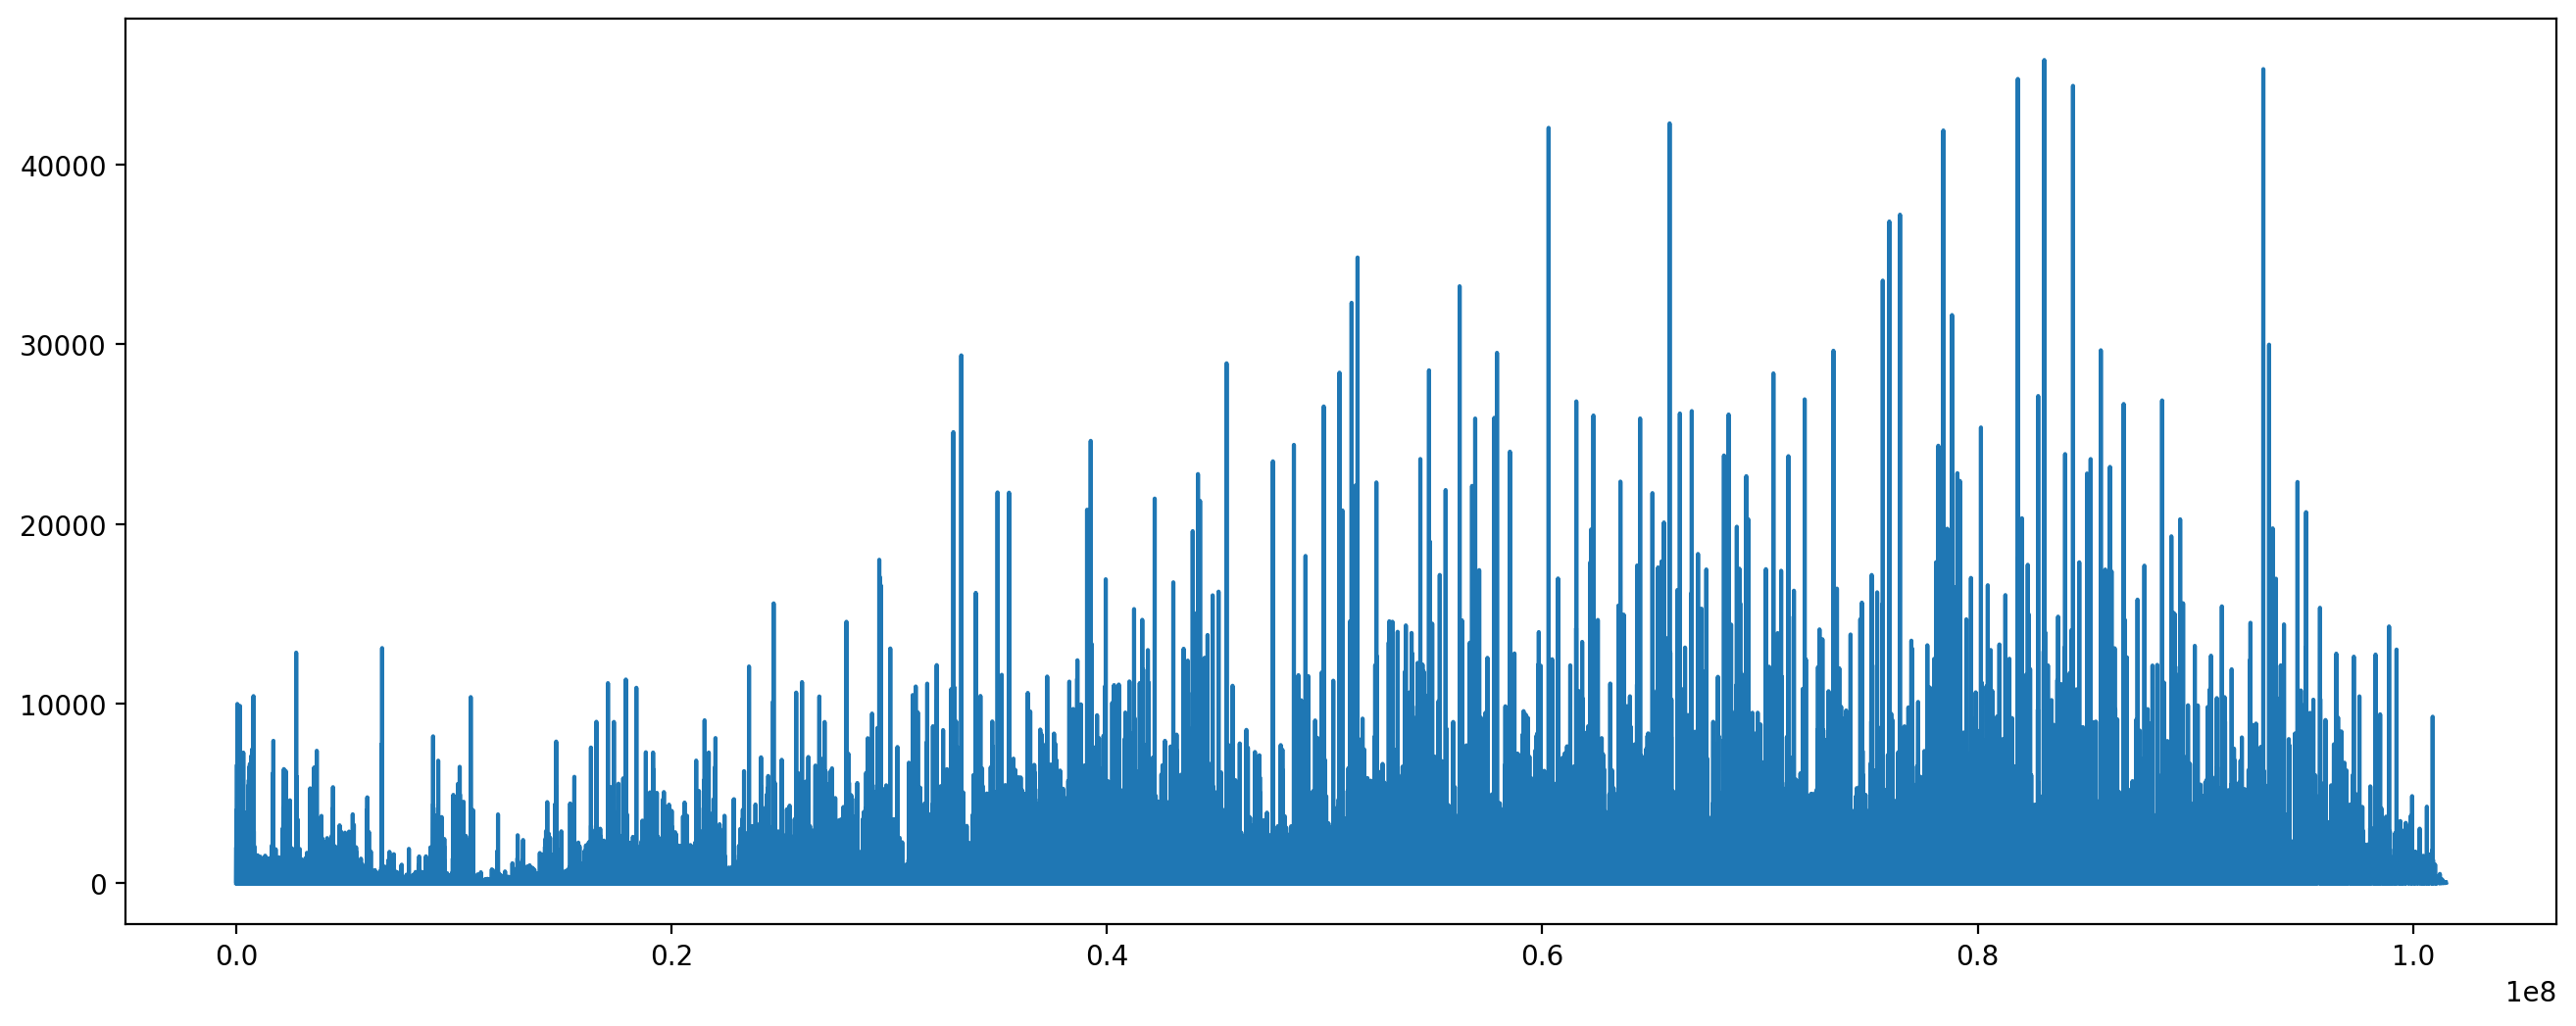

In [121]:
plt.subplots(figsize=(16, 6))
plt.plot(tracks['track_id'], tracks['popularity'])

Наиболее популярные треки

In [122]:
tracks.sort_values(by="popularity",ascending=False).head()

,track_id,albums,artists,genres,name,genre_names,artist_names,album_names,popularity
940964,83063895,[15598104],[5129397],"[11, 20]",Птичка,"[pop, ruspop]",[HammAli & Navai],[Птичка],45841.0
980395,93126179,[18729695],[4664209],"[11, 20]",Солнце Монако,"[pop, ruspop]",[Люся Чеботина],[The End],45334.0
935913,81848875,[15213275],[10318860],"[11, 20]",Федерико Феллини,"[pop, ruspop]",[Galibri & Mavik],[Федерико Феллини],44788.0
946020,84382282,[15985737],"[5056591, 2938031]","[3, 75]",Я в моменте,"[rusrap, rap]","[Джарахов, Markul]",[Я в моменте],44403.0
829320,65851540,[10692414],[1554548],"[11, 20]",Юность,"[pop, ruspop]",[Dabro],[Юность],42314.0


Наиболее популярные жанры

In [123]:
genre_pop = {}
    
    
for k,item in tracks['genres'].items():
    for i in range(len(item)):
        if item[i] in genre_pop.keys():
            genre_pop[item[i]] += tracks['popularity'][item[i]]
        else:
            genre_pop[item[i]] = tracks['popularity'][item[i]]


In [125]:
genre_popularity = pd.DataFrame.from_dict(genre_pop, orient='index')
genre_popularity

,0
11,498855.0
21,0.0
59,0.0
102,11969409.0
14,55177.0
...,...
105,2670.0
108,15708.0
107,2480.0
106,60.0


In [126]:
genre_popularity = genre_popularity.reset_index()
genre_popularity

,index,0
0,11,498855.0
1,21,0.0
2,59,0.0
3,102,11969409.0
4,14,55177.0
...,...,...
168,105,2670.0
169,108,15708.0
170,107,2480.0
171,106,60.0


In [136]:
genre_popularity = genre_popularity.rename(columns={'index':"id"})

In [137]:
genre_popularity = genre_popularity.merge(genre_names, how="right", on='id')
genre_popularity

,id,0,genre_name
0,0,NaN,all
1,1,0.0,eastern
2,2,0.0,rusrock
3,3,0.0,rusrap
4,4,0.0,postrock
...,...,...,...
161,1182,454.0,balkan
162,1197,0.0,experimental
163,1370,NaN,europop
164,1484,1606.0,meditation


In [138]:
genre_popularity = genre_popularity.rename(columns={0:"genre_popularity"})
genre_popularity["genre_popularity"] = genre_popularity["genre_popularity"].fillna(0)
genre_popularity.head()

,id,genre_popularity,genre_name
0,0,0.0,all
1,1,0.0,eastern
2,2,0.0,rusrock
3,3,0.0,rusrap
4,4,0.0,postrock


In [139]:
genre_popularity.sort_values(by='genre_popularity',ascending=False)

,id,genre_popularity,genre_name
102,102,11969409.0,allrock
75,75,5128480.0,rap
54,54,2659230.0,posthardcore
77,77,1181875.0,education
50,50,1128816.0,punk
...,...,...,...
72,72,0.0,business
71,71,0.0,arts
70,70,0.0,indie
69,69,0.0,classicalmusic


Треки, которые никто не прослушал

In [140]:
not_list = tracks[~tracks['track_id'].isin(interactions['track_id'])]
not_list

,track_id,albums,artists,genres,name,genre_names,artist_names,album_names,popularity
0,26,"[3, 2490753]",[16],"[11, 21]",Complimentary Me,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]",0.0
1,38,"[3, 2490753]",[16],"[11, 21]",Momma's Boy,"[pop, folk]",[Elizabeth & the Catapult],"[Taller Children, Taller Children]",0.0
2,135,"[12, 214, 2490809]",[84],[11],Atticus,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",0.0
3,136,"[12, 214, 2490809]",[84],[11],24 Hours,[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Wild Yo...",0.0
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],Don't Upset The Rhythm (Go Baby Go),[pop],[Noisettes],"[Wild Young Hearts, Wild Young Hearts, Don't U...",0.0
...,...,...,...,...,...,...,...,...,...
957865,87341742,[16871204],[12541816],"[11, 20]",Гроза и муза,"[pop, ruspop]",[Zina Bless],[Гроза и муза],0.0
958226,87434758,[11781223],[],"[62, 72, 77]",Как развивать самодисциплину и личный бренд • ...,"[podcasts, business, education]",[],[Потом доделаю],0.0
958675,87543206,[16934920],[11873213],[47],Gospel,[metal],[LongestSoloEver],[Gospel],0.0
966001,89472205,[17552246],[11861149],"[11, 20]",Когда Ты Рядом,"[pop, ruspop]",[Bolin & Almarie],[Когда Ты Рядом],0.0


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [141]:
interactions['started_at'] = interactions['started_at'].dt.date
interactions.head()

,user_id,track_id,track_seq,started_at
31,3,68348391,32,2022-12-14
32,3,78194999,33,2022-12-20
197,4,59535907,198,2022-11-03
198,4,60102026,199,2022-11-03
199,4,61424101,200,2022-11-03


In [142]:
interactions['rating'] = interactions.groupby("user_id")['track_seq'].rank(method='dense', ascending=False)
interactions.head()

,user_id,track_id,track_seq,started_at,rating
31,3,68348391,32,2022-12-14,2.0
32,3,78194999,33,2022-12-20,1.0
197,4,59535907,198,2022-11-03,59.0
198,4,60102026,199,2022-11-03,58.0
199,4,61424101,200,2022-11-03,57.0


# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [143]:
tracks.to_parquet("./recsys/data/items.parquet")
interactions.to_parquet("./recsys/data/events.parquet")
genre_popularity.to_parquet("./recsys/data/genre_popularity.parquet")

In [144]:
s3_client.upload_file('./recsys/data/items.parquet', S3_BUCKET_NAME, 'recsys/data/items.parquet')

In [145]:
s3_client.upload_file('./recsys/data/events.parquet', S3_BUCKET_NAME, 'recsys/data/events.parquet')

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
В целом, общий обзор кода показывает, что он структурирован и выполняет задачи обработки данных, загрузки и объединения информации, что является хорошей основой для дальнейших этапов проекта, но мне не хватило выводов и комментариев по ходу всего анализа. </div>


# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [5]:
items = pd.read_parquet("./recsys/data/items.parquet")
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   track_id      1000000 non-null  int64  
 1   albums        1000000 non-null  object 
 2   artists       1000000 non-null  object 
 3   genres        1000000 non-null  object 
 4   name          1000000 non-null  object 
 5   genre_names   1000000 non-null  object 
 6   artist_names  1000000 non-null  object 
 7   album_names   1000000 non-null  object 
 8   popularity    1000000 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 68.7+ MB


In [3]:
events = pd.read_parquet("./recsys/data/events.parquet")
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63918740 entries, 31 to 291
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     int32  
 1   track_id    int32  
 2   track_seq   int16  
 3   started_at  object 
 4   rating      float64
dtypes: float64(1), int16(1), int32(2), object(1)
memory usage: 2.0+ GB


In [7]:
genre_popularity = pd.read_parquet("./recsys/data/genre_popularity.parquet")
genre_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                166 non-null    int64  
 1   genre_popularity  166 non-null    float64
 2   genre_name        166 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [4]:
train_test_global_time_split_date = pd.to_datetime("2022-12-16").date()
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date

events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

common_users = list(set(users_train) & set(users_test))
print(len(users_train), len(users_test), len(common_users)) 

1140855 781881 743264


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Логика разделения данных по времени для формирования тренировочной и тестовой выборок выполнена корректно. Этот</div>




In [5]:
cold_users = list(set(users_test) - set(common_users))
print(len(cold_users)) 

38617


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [10]:
items['score'] = (items['popularity']/items['popularity'].sum())*1000
items.sort_values(by="score",ascending=False).head(5) 

,track_id,albums,artists,genres,name,genre_names,artist_names,album_names,popularity,score
940964,83063895,[15598104],[5129397],"[11, 20]",Птичка,"[pop, ruspop]",[HammAli & Navai],[Птичка],45841.0,0.717176
980395,93126179,[18729695],[4664209],"[11, 20]",Солнце Монако,"[pop, ruspop]",[Люся Чеботина],[The End],45334.0,0.709244
935913,81848875,[15213275],[10318860],"[11, 20]",Федерико Феллини,"[pop, ruspop]",[Galibri & Mavik],[Федерико Феллини],44788.0,0.700702
946020,84382282,[15985737],"[5056591, 2938031]","[3, 75]",Я в моменте,"[rusrap, rap]","[Джарахов, Markul]",[Я в моменте],44403.0,0.694679
829320,65851540,[10692414],[1554548],"[11, 20]",Юность,"[pop, ruspop]",[Dabro],[Юность],42314.0,0.661997


In [11]:
top_popular = items.sort_values(by="score",ascending=False).head(100).reset_index(drop=True)
top_popular.head(5) 

,track_id,albums,artists,genres,name,genre_names,artist_names,album_names,popularity,score
0,83063895,[15598104],[5129397],"[11, 20]",Птичка,"[pop, ruspop]",[HammAli & Navai],[Птичка],45841.0,0.717176
1,93126179,[18729695],[4664209],"[11, 20]",Солнце Монако,"[pop, ruspop]",[Люся Чеботина],[The End],45334.0,0.709244
2,81848875,[15213275],[10318860],"[11, 20]",Федерико Феллини,"[pop, ruspop]",[Galibri & Mavik],[Федерико Феллини],44788.0,0.700702
3,84382282,[15985737],"[5056591, 2938031]","[3, 75]",Я в моменте,"[rusrap, rap]","[Джарахов, Markul]",[Я в моменте],44403.0,0.694679
4,65851540,[10692414],[1554548],"[11, 20]",Юность,"[pop, ruspop]",[Dabro],[Юность],42314.0,0.661997


In [12]:
top_popular.to_parquet("./recsys/recommendations/top_popular.parquet")

# Персональные

Рассчитаем персональные рекомендации.

In [ ]:
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["track_id"])
items["track_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])
events_test["track_id_enc"] = item_encoder.transform(events_test["track_id"])

In [14]:
events_train.head()

,user_id,track_id,track_seq,started_at,rating,user_id_enc,track_id_enc
31,3,68348391,32,2022-12-14,2.0,0,848375
197,4,59535907,198,2022-11-03,59.0,1,772727
198,4,60102026,199,2022-11-03,58.0,1,777786
199,4,61424101,200,2022-11-03,57.0,1,789238
200,4,61619676,201,2022-11-05,56.0,1,790871


In [15]:
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['track_id_enc'])),
    dtype=np.int8)

In [16]:
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train) 

/home/mle-user/mle_projects/mle-recsys-project-start/.venv_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [13:12<00:00, 15.86s/it]


In [17]:
user_ids_encoded = range(len(user_encoder.classes_))

als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=50)

In [18]:
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "track_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["track_id_enc", "score"], ignore_index=True)

als_recommendations["track_id_enc"] = als_recommendations["track_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["track_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "track_id_enc"])

In [19]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.head(5)

,user_id,item_id,score
0,3,68348390,0.009621
1,3,68348389,0.009436
2,3,68348391,0.008584
3,3,68878561,0.007992
4,3,68070362,0.007861


In [20]:
als_recommendations = als_recommendations.rename(columns = {"item_id":"track_id"})
als_recommendations.head(5)

,user_id,track_id,score
0,3,68348390,0.009621
1,3,68348389,0.009436
2,3,68348391,0.008584
3,3,68878561,0.007992
4,3,68070362,0.007861


In [21]:
als_recommendations.to_parquet("./recsys/recommendations/personal_als.parquet")

In [22]:
user_item_matrix_test = scipy.sparse.csr_matrix((
    events_test["rating"],
    (events_test['user_id_enc'], events_test['track_id_enc'])),
    dtype=np.int8)

In [23]:
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_test) 

100%|██████████| 50/50 [05:23<00:00,  6.47s/it]


In [24]:
user_ids_encoded = range(len(user_encoder.classes_))

als_recommendations_test = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_test[user_ids_encoded], 
    filter_already_liked_items=False, N=50)

In [25]:
item_ids_enc = als_recommendations_test[0]
als_scores = als_recommendations_test[1]

als_recommendations_test = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "track_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations_test = als_recommendations_test.explode(["track_id_enc", "score"], ignore_index=True)

als_recommendations_test["track_id_enc"] = als_recommendations_test["track_id_enc"].astype("int")
als_recommendations_test["score"] = als_recommendations_test["score"].astype("float")

als_recommendations_test["user_id"] = user_encoder.inverse_transform(als_recommendations_test["user_id_enc"])
als_recommendations_test["track_id"] = item_encoder.inverse_transform(als_recommendations_test["track_id_enc"])
als_recommendations_test = als_recommendations_test.drop(columns=["user_id_enc", "track_id_enc"])

In [26]:
als_recommendations_test = als_recommendations_test[["user_id", "track_id", "score"]]
als_recommendations_test.head(5)

,user_id,track_id,score
0,3,78194999,0.008977
1,3,78426489,0.008427
2,3,76434671,0.008340
3,3,75642961,0.008131
4,3,75944934,0.007619


In [27]:
als_recommendations_test.to_parquet("./recsys/recommendations/personal_als_test.parquet")

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [28]:
train_item_ids_enc = events_train['track_id_enc'].unique()

max_similar_items = 10

similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    "track_id_enc": train_item_ids_enc,
    "sim_track_id_enc": sim_item_item_ids_enc.tolist(), 
    "score": sim_item_scores.tolist()})
similar_items

,track_id_enc,sim_track_id_enc,score
0,848375,"[848375, 848371, 852166, 852160, 848374, 84836...","[1.0000001192092896, 0.9773719310760498, 0.975..."
1,772727,"[772727, 764538, 751972, 788802, 743508, 80316...","[1.0000001192092896, 0.9542165398597717, 0.948..."
2,777786,"[777786, 803097, 778942, 777407, 781163, 76830...","[1.0000001192092896, 0.9115850329399109, 0.904..."
3,789238,"[789238, 800184, 775428, 763018, 824124, 80838...","[0.9999999403953552, 0.9310317039489746, 0.929..."
4,790871,"[791695, 788943, 765579, 790871, 743267, 84163...","[1.0000001192092896, 1.0000001192092896, 1.000..."
...,...,...,...
895114,146080,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
895115,183967,"[126377, 415557, 991, 126389, 23958, 492592, 1...","[1.0000001192092896, 1.0, 1.0, 0.9999999403953..."
895116,588187,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
895117,756515,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [29]:
similar_items = similar_items.explode(["sim_track_id_enc", "score"], ignore_index=True)
similar_items.head()

,track_id_enc,sim_track_id_enc,score
0,848375,848375,1.0
1,848375,848371,0.977372
2,848375,852166,0.975442
3,848375,852160,0.970236
4,848375,848374,0.96826


In [30]:
similar_items["sim_track_id_enc"] = similar_items["sim_track_id_enc"].astype("int")
similar_items["score"] = similar_items["score"].astype("float")
similar_items.head()

,track_id_enc,sim_track_id_enc,score
0,848375,848375,1.000000
1,848375,848371,0.977372
2,848375,852166,0.975442
3,848375,852160,0.970236
4,848375,848374,0.968260


In [31]:
similar_items["track_id_1"] = item_encoder.inverse_transform(similar_items["track_id_enc"])
similar_items["track_id_2"] = item_encoder.inverse_transform(similar_items["sim_track_id_enc"])
similar_items = similar_items.drop(columns=["track_id_enc", "sim_track_id_enc"])

similar_items = similar_items.query("track_id_1 != track_id_2")
similar_items.head()

,score,track_id_1,track_id_2
1,0.977372,68348391,68348387
2,0.975442,68348391,68878565
3,0.970236,68348391,68878539
4,0.968260,68348391,68348390
5,0.968010,68348391,68348384


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Использование similar_items из ALS для расчета похожих треков полезно для дальнейших онлайн-рекомендаций, молодец!
    
Однако стоит добавить проверку на качество и надежность рекомендаций, так как неочевидные похожие треки могут снизить качество рекомендаций. Возможно, стоит оставить только те пары, у которых score выше определенного порога.</div>


In [32]:
similar_items.to_parquet("./recsys/recommendations/similar.parquet")

In [33]:
s3_client.upload_file('./recsys/recommendations/top_popular.parquet', S3_BUCKET_NAME, 'recsys/recommendations/top_popular.parquet')
s3_client.upload_file('./recsys/recommendations/personal_als.parquet', S3_BUCKET_NAME, 'recsys/recommendations/personal_als.parquet')
s3_client.upload_file('./recsys/recommendations/similar.parquet', S3_BUCKET_NAME, 'recsys/recommendations/similar.parquet')

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [34]:
personal_als = pd.read_parquet("./recsys/recommendations/personal_als.parquet")
personal_als.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58973600 entries, 0 to 58973599
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int32  
 1   track_id  int64  
 2   score     float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.1 GB


In [35]:
personal_als_test = pd.read_parquet("./recsys/recommendations/personal_als_test.parquet")
personal_als_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58973600 entries, 0 to 58973599
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int32  
 1   track_id  int64  
 2   score     float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.1 GB


In [36]:
user_features = events_train.groupby("user_id").agg(
    count_tracks=("track_id", "count"))
user_features.head()

,count_tracks
user_id,
3,1
4,47
5,17
7,10
9,22


In [37]:
user_features_test = events_test.groupby("user_id").agg(
    count_tracks=("track_id", "count"))
user_features_test.head()

,count_tracks
user_id,
3,1
4,12
5,4
7,3
9,7


In [38]:
candidates_for_test = personal_als_test.merge(user_features_test, on="user_id", how="left")
candidates_for_test.head()

,user_id,track_id,score,count_tracks
0,3,78194999,0.008977,1.0
1,3,78426489,0.008427,1.0
2,3,76434671,0.008340,1.0
3,3,75642961,0.008131,1.0
4,3,75944934,0.007619,1.0


In [39]:
candidates_for_train = personal_als.merge(user_features, on="user_id", how="left")
candidates_for_train.head()

,user_id,track_id,score,count_tracks
0,3,68348390,0.009621,1.0
1,3,68348389,0.009436,1.0
2,3,68348391,0.008584,1.0
3,3,68878561,0.007992,1.0
4,3,68070362,0.007861,1.0


In [40]:
genre_popularity['genre_rank'] = genre_popularity['genre_popularity'].rank(method='dense', ascending=True)
genre_popularity.sort_values(by="genre_rank",ascending=False)

,id,genre_popularity,genre_name,genre_rank
102,102,11969409.0,allrock,90.0
75,75,5128480.0,rap,89.0
54,54,2659230.0,posthardcore,88.0
77,77,1181875.0,education,87.0
50,50,1128816.0,punk,86.0
...,...,...,...,...
72,72,0.0,business,1.0
71,71,0.0,arts,1.0
70,70,0.0,indie,1.0
69,69,0.0,classicalmusic,1.0


In [41]:
genre_features = genre_popularity.drop(columns=['id','genre_popularity','genre_name'])
genre_features.head()

,genre_rank
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
items['genre_rank'] = np.NAN
for k,item in items['genres'].items():
    pop = 0
    for i in range(len(item)):
        for k_a, i_a in genre_features.items():
            if item[i] in i_a.keys():
                if pop <= i_a[item[i]]:
                    pop = i_a[item[i]]
    items['genre_rank'][k] = pop 

In [43]:
candidates_for_train = candidates_for_train.merge(items[['track_id','genre_rank']], on="track_id", how="left")
candidates_for_train.head()

,user_id,track_id,score,count_tracks,genre_rank
0,3,68348390,0.009621,1.0,89.0
1,3,68348389,0.009436,1.0,89.0
2,3,68348391,0.008584,1.0,89.0
3,3,68878561,0.007992,1.0,89.0
4,3,68070362,0.007861,1.0,89.0


In [44]:
candidates_for_test = candidates_for_test.merge(items[['track_id','genre_rank']], on="track_id", how="left")
candidates_for_test.head()

,user_id,track_id,score,count_tracks,genre_rank
0,3,78194999,0.008977,1.0,89.0
1,3,78426489,0.008427,1.0,1.0
2,3,76434671,0.008340,1.0,1.0
3,3,75642961,0.008131,1.0,83.0
4,3,75944934,0.007619,1.0,89.0


In [45]:
candidates_for_test.to_parquet("./recsys/recommendations/candidates_for_test.parquet")
candidates_for_train.to_parquet("./recsys/recommendations/candidates_for_train.parquet")

In [8]:
candidates_for_train = pd.read_parquet("./recsys/recommendations/candidates_for_train.parquet")

Признаки: Количество прослушаных треков у пользователя, als_score и пополярность жанра (если у трека два жанра, то выбирается большая)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Рекомендуется добавить больше подробностей по использованию этих признаков в дальнейшем, чтобы было ясно, как именно эти данные будут способствовать ранжированию.
</div>


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [6]:
events_train["target"] = 1
events_train.head()

/tmp/ipykernel_4786/1735681661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["target"] = 1


,user_id,track_id,track_seq,started_at,rating,target
31,3,68348391,32,2022-12-14,2.0,1
197,4,59535907,198,2022-11-03,59.0,1
198,4,60102026,199,2022-11-03,58.0,1
199,4,61424101,200,2022-11-03,57.0,1
200,4,61619676,201,2022-11-05,56.0,1


In [9]:
candidates_for_train = candidates_for_train.merge(events_train[["user_id", "track_id", "target"]],
                              on=['user_id','track_id'], 
                              how="left")
candidates_for_train.head()

,user_id,track_id,score,count_tracks,genre_rank,target
0,3,68348390,0.009621,1.0,89.0,NaN
1,3,68348389,0.009436,1.0,89.0,NaN
2,3,68348391,0.008584,1.0,89.0,1.0
3,3,68878561,0.007992,1.0,89.0,NaN
4,3,68070362,0.007861,1.0,89.0,NaN


In [10]:
candidates_for_train["target"] = candidates_for_train["target"].fillna(0).astype("int")

In [11]:
candidates_for_train = candidates_for_train.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [12]:
candidates_for_train.to_parquet("./recsys/recommendations/candidates_for_train.parquet")

In [3]:
candidates_for_train = pd.read_parquet("./recsys/recommendations/candidates_for_train.parquet")
candidates_for_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51213750 entries, 0 to 58973599
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int32  
 1   track_id      int64  
 2   score         float64
 3   count_tracks  float64
 4   genre_rank    float64
 5   target        int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 2.5 GB


In [4]:
features = ['score', 'count_tracks', 'genre_rank']
target = 'target'

train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

cb_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

cb_model.fit(train_data) 

0:	learn: 0.5950044	total: 4.37s	remaining: 14m 29s
100:	learn: 0.3219332	total: 6m 9s	remaining: 6m 1s
199:	learn: 0.3215186	total: 11m 57s	remaining: 0us


In [5]:
candidates_for_test = pd.read_parquet("./recsys/recommendations/candidates_for_test.parquet")

In [6]:
inference_data = Pool(data=candidates_for_test[features])
predictions = cb_model.predict_proba(inference_data)

candidates_for_test["cb_score"] = predictions[:, 1]

candidates_for_test = candidates_for_test.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_for_test["rank"] = candidates_for_test.groupby("user_id")['cb_score'].rank(method='dense', ascending=False)
candidates_for_test['rank'] = np.where(candidates_for_test['rank'] > 100, 100, candidates_for_test['rank'])

max_recommendations_per_user = 100
final_recommendations = candidates_for_test\
        .groupby("user_id") \
        .head(100)

In [7]:
final_recommendations.to_parquet("./recsys/recommendations/recommendations.parquet")

In [66]:
s3_client.upload_file('./recsys/recommendations/recommendations.parquet', S3_BUCKET_NAME, 'recsys/recommendations/recommendations.parquet')

In [8]:
final_recommendations.head()

,user_id,track_id,score,count_tracks,genre_rank,cb_score,rank
0,3,78194999,0.008977,1.0,89.0,0.031185,1.0
4,3,75944934,0.007619,1.0,89.0,0.029039,2.0
7,3,84382282,0.007052,1.0,89.0,0.027700,3.0
13,3,78608850,0.006225,1.0,89.0,0.027700,3.0
16,3,75630144,0.006041,1.0,89.0,0.027700,3.0


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [9]:
final_recommendations = pd.read_parquet("./recsys/recommendations/recommendations.parquet")

In [11]:
final_recommendations.head()

,user_id,track_id,score,count_tracks,genre_rank,cb_score,rank
0,3,78194999,0.008977,1.0,89.0,0.031185,1.0
4,3,75944934,0.007619,1.0,89.0,0.029039,2.0
7,3,84382282,0.007052,1.0,89.0,0.027700,3.0
13,3,78608850,0.006225,1.0,89.0,0.027700,3.0
16,3,75630144,0.006041,1.0,89.0,0.027700,3.0


In [6]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):


    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["track_id", "cb_score"], ascending=[True, False])
    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(events_train["track_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "cb_score"]], 
        on=["user_id", "track_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["cb_score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [7]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())# ваш код здесь #
    recall = recall.fillna(0).mean()
    return precision, recall

In [12]:
cb_events_recs_for_binary_metrics_5 = process_events_recs_for_binary_metrics(
    events_train,
    events_test,
    final_recommendations,
    top_k=5)

cb_precision_5, cb_recall_5 = compute_cls_metrics(cb_events_recs_for_binary_metrics_5)

print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}")

/tmp/ipykernel_2183/612795073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


precision: 0.041, recall: 0.006


In [44]:
sm = final_recommendations['track_id'].nunique()
sm


18894

In [45]:
cov_items = sm/items.shape[0]
print(f"coverage: {cov_items:.2f}") 

coverage: 0.02


In [ ]:
events_test["listened"] = True
final_recommendations = final_recommendations.merge(events_test[["user_id", "track_id", "listened"]], on=["user_id", "track_id"], how="left")
final_recommendations["listened"] = final_recommendations["listened"].fillna(False).astype("bool")
final_recommendations = final_recommendations.sort_values(by='cb_score', ascending=False)
final_recommendations["rank"] = final_recommendations.groupby("user_id").cumcount() + 1

In [54]:
novelty_5 = (1-final_recommendations.query("rank <= 5").groupby("user_id")["listened"].mean())
print(f"novelty: {novelty_5.mean():.2f}") 

novelty: 1.00


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

In [55]:
print(f"precision: {cb_precision_5:.3f}, recall: {cb_recall_5:.3f}, coverage: {cov_items:.2f}, novelty: {novelty_5.mean():.2f}")

precision: 0.041, recall: 0.006, coverage: 0.02, novelty: 1.00


precision: 0.041, recall: 0.006, coverage: 0.02, novelty: 1.00  
Вывод: Метрики слабые, на это повлияло сокращение events до двух месяцев, что показывает метрика покрытие. Сократил чтобы тратилось меньше времени на обработку рекомендаций, возможно стояло сокращать по количеству пользователей. Но из-за этого предлагаются новые треки, что показывает метрика новизны.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Никита, ты проделал хорошо работу над созданием ранжирующей модели рекомендаций. Тебе удалось грамотно структурировать обработку данных, применить модель, а также проработать все этапы – от подготовки данных до расчетов метрик.

Метрики оказались неоднозначными: высокая новизна говорит о предложении новых треков, но низкие значения precision и recall (0.041 и 0.006) сигнализируют о необходимости доработок. Ты также сделал верное замечание о сокращении объема данных по временным рамкам, чтобы снизить затраты времени, однако это привело к уменьшению покрытия. В будущем стоит попробовать сокращение по количеству пользователей, что, возможно, улучшит метрики покрытия и точности.

В целом, твоя работа демонстрирует хорошие знания подходов к построению рекомендательных систем и дальнейшие перспективы для улучшения в оптимизации данных и параметров модели. Желаю тебе удачи в будущих спринтах!

</div>

